In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA Heart Disease/heart_2020_cleaned.csv')

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
count =df['HeartDisease'].value_counts()
print(count)

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


The given dataset is imbalanced, with the number of positive cases ( people with heart disease) being significantly less than the negative cases ( people without heart disease). To address this imbalance, oversampling the positive cases can be an effective strategy before applying machine learning models.



In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
filtered_df = df[(df['Smoking'] == 'Yes') & (df['AlcoholDrinking'] == 'Yes')]

In [ ]:
count =filtered_df['HeartDisease'].value_counts()
print(count)

HeartDisease
No     12525
Yes      890
Name: count, dtype: int64


This explains that only drinking and smoking are not the cause of HeartDisease though if you drink and chances of having heart disease are high

In [ ]:
grouped_df = filtered_df.groupby(['Sex', 'HeartDisease']).size().reset_index(name='count')

<Axes: xlabel='Sex', ylabel='count'>

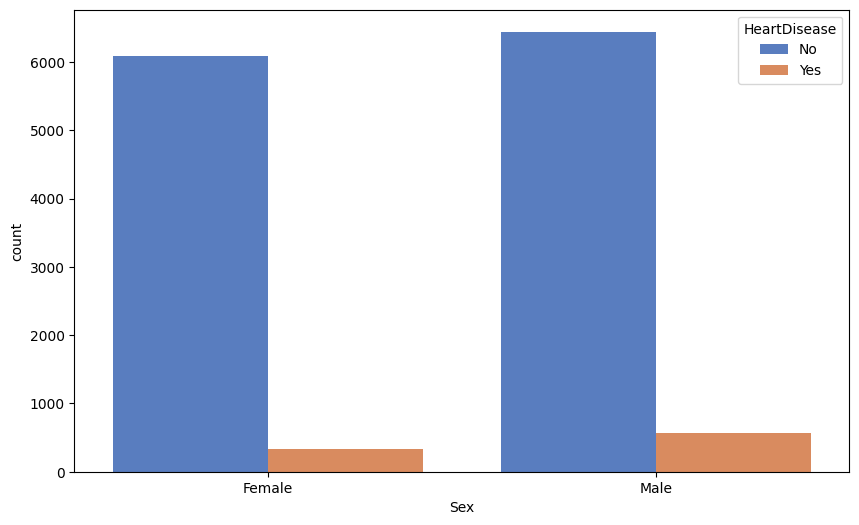

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='count', hue='HeartDisease', data=grouped_df, palette='muted')

In [ ]:
filtered_df2 = df[(df['Smoking'] == 'No') & (df['AlcoholDrinking'] == 'No')]

In [ ]:
grouped_df = filtered_df2.groupby(['Sex', 'HeartDisease']).size().reset_index(name='count')

<Axes: xlabel='Sex', ylabel='count'>

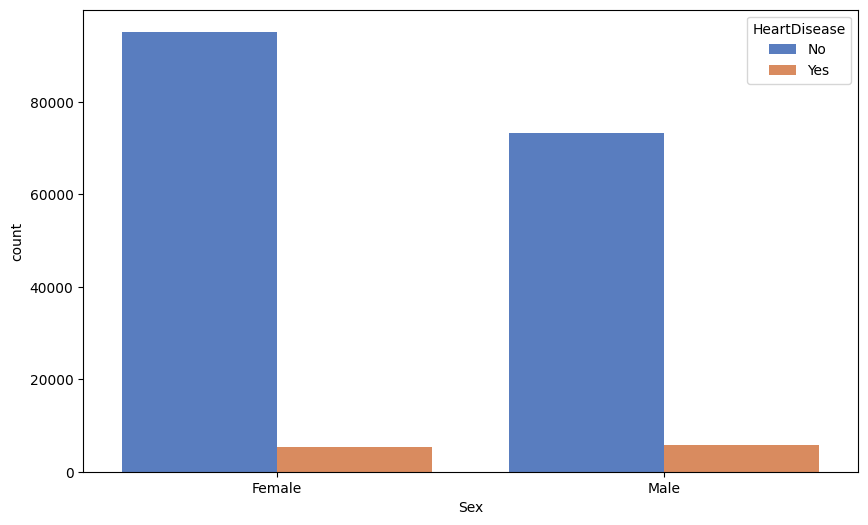

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='count', hue='HeartDisease', data=grouped_df, palette='muted')

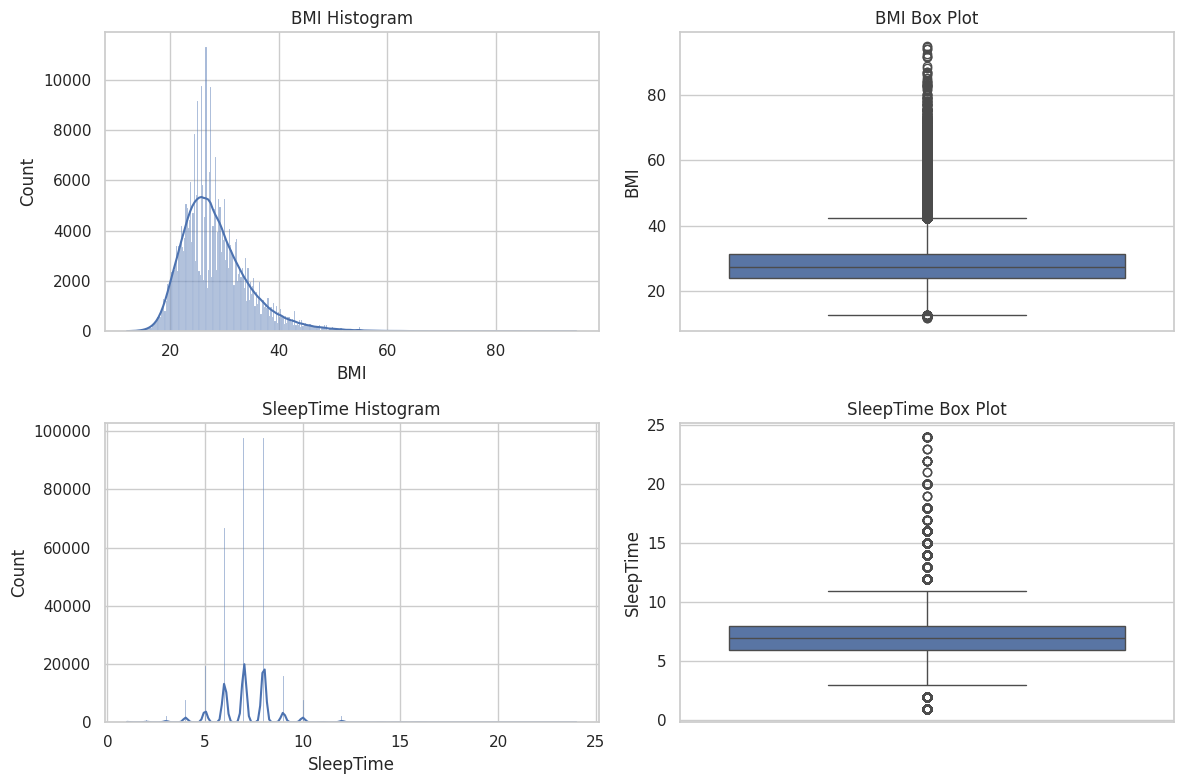

In [ ]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create subplots for BMI and SleepTime
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram for BMI
sns.histplot(df['BMI'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('BMI Histogram')

# Box plot for BMI
sns.boxplot(df['BMI'], ax=axes[0, 1])
axes[0, 1].set_title('BMI Box Plot')

# Histogram for SleepTime
sns.histplot(df['SleepTime'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('SleepTime Histogram')

# Box plot for SleepTime
sns.boxplot(df['SleepTime'], ax=axes[1, 1])
axes[1, 1].set_title('SleepTime Box Plot')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
print(numerical_df.head())

     BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0


## **Eigen Value**
Eigenvalues indicate the amount of variance captured by each principal component in PCA. In the output, the eigenvalues are 82.42, 39.05, 45.47, and 2.03, with the first eigenvalue being the largest, suggesting it explains the most variance. A high percentage of variance captured by the first few eigenvalues indicates that dimensionality reduction is effective. This allows for simplifying the dataset while retaining essential information, leading to improved modeling efficiency and performance.




## **Eigen Vector**
**First Eigenvector [0.1467, 0.7030, 0.6956, -0.0188]** is primarily influenced by the Physical Health and Mental Health features, with a negative contribution from Sleep Time, suggesting that as sleep time increases, the score on this component decreases.

**Second Eigenvector [0.9553, -0.2833, 0.0845, -0.00997]** is mainly driven by the BMI feature, indicating that higher BMI values are associated with higher scores on this component, while Physical Health has a minor negative influence.

**Third Eigenvector [0.2566, 0.6523, -0.7131, 0.00914]** is significantly influenced by Mental Health with a strong negative contribution, suggesting that as mental health declines, the score on this component increases, while Physical Health and BMI have lesser positive effects.

**Fourth Eigenvector [0.0099, 0.0045, 0.0205, 0.9997]** is almost entirely influenced by Sleep Time, indicating that this component primarily captures variations related to sleep duration, with minimal contribution from the other features.

In [ ]:
# Importing the necessary module
from numpy import linalg as LA
import numpy as np

# Calculate the covariance matrix of your numerical data.
covariance_matrix = np.cov(numerical_df.T)

# Perform eigenvalue decomposition:
eigenvalues, eigenvectors = LA.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[82.41624701 39.04656573 45.47481328  2.02628603]

Eigenvectors:
[[ 0.1467321   0.95525578  0.2566264   0.00994904]
 [ 0.70302126 -0.28327283  0.65230189  0.00445616]
 [ 0.69561199  0.08451877 -0.71313507  0.02046731]
 [-0.018835   -0.00997412  0.00913846  0.99973109]]


## **Performing Chi_square of target attribute(Heart Disease) with all other attribute to find out the usefullness of data for prediction**

In [ ]:
from scipy.stats import chi2_contingency

for column in df.select_dtypes(include=['object']).columns:
  if column != 'HeartDisease':
    contingency_table = pd.crosstab(df[column], df['HeartDisease'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column} and HeartDisease:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print("-----------------------------------")

Chi-square test for Smoking and HeartDisease:
Chi-square statistic: 3713.0331469808216
P-value: 0.0
-----------------------------------
Chi-square test for AlcoholDrinking and HeartDisease:
Chi-square statistic: 328.64916890132054
P-value: 1.892352227090306e-73
-----------------------------------
Chi-square test for Stroke and HeartDisease:
Chi-square statistic: 12386.4888802668
P-value: 0.0
-----------------------------------
Chi-square test for DiffWalking and HeartDisease:
Chi-square statistic: 12951.153005437296
P-value: 0.0
-----------------------------------
Chi-square test for Sex and HeartDisease:
Chi-square statistic: 1568.3069168517372
P-value: 0.0
-----------------------------------
Chi-square test for AgeCategory and HeartDisease:
Chi-square statistic: 19299.920391132553
P-value: 0.0
-----------------------------------
Chi-square test for Race and HeartDisease:
Chi-square statistic: 844.3148859632537
P-value: 2.9886131565632597e-180
-----------------------------------
Chi-s

The results indicate strong associations between various health factors and heart disease. Specifically, the following conclusions can be drawn:

- **Smoking and Heart Disease**: The high Chi-square statistic and very low p-value suggest that smoking is significantly associated with an increased risk of heart disease.

- **Alcohol Consumption**: Similar to smoking, alcohol consumption is strongly correlated with heart disease, indicating that excessive drinking may contribute to heart disease risk.

- **Stroke and Heart Disease**: The analysis shows a robust association, highlighting the importance of monitoring and managing stroke risk factors to prevent heart disease.

- **Demographic Factors**: Factors such as sex, age, and race also show significant associations, suggesting that these demographic variables may influence heart disease prevalence.

- **Chronic Conditions**: Conditions such as diabetes, kidney disease, and asthma are also significantly associated with heart disease, emphasizing the need for comprehensive healthcare strategies targeting these populations.

These findings underscore the importance of lifestyle choices and medical conditions in influencing heart disease risk. Further research could explore the causal relationships and potential interventions to mitigate these risks.